In [1]:
import utils
import matplotlib.pyplot as plt
from task2a import pre_process_images, one_hot_encode, SoftmaxModel
from task2 import SoftmaxTrainer
import pickle

In [2]:
# hyperparameters DO NOT CHANGE IF NOT SPECIFIED IN ASSIGNMENT TEXT
num_epochs = 50
learning_rate = .1
batch_size = 32
neurons_per_layer = [64, 10]
momentum_gamma = .9  # Task 3 hyperparameter
shuffle_data = True
load_experiments = True

if load_experiments:
    with open("experiments.pkl", "rb") as f:
        experiments = pickle.load(f)
else:
    experiments = [
        {
            'id': "no_tricks",
            "use_improved_weight_init": False,
            "use_improved_sigmoid": False,
            "use_momentum": False,
            "train_history": None,
            "val_history": None,
            "learning_rate": 0.1,
            "neurons_per_layer": [64, 10]
        },
        {
            "id": "gaussian_weight_init",
            "use_improved_weight_init": True,
            "use_improved_sigmoid": False,
            "use_momentum": False,
            "train_history": None,
            "val_history": None,
            "learning_rate": 0.1,
            "neurons_per_layer": [64, 10]
        },
            {
            "id": "improved_sigmoid",
            "use_improved_weight_init": True,
            "use_improved_sigmoid": True,
            "use_momentum": False,
            "train_history": None,
            "val_history": None,
            "learning_rate": 0.1,
            "neurons_per_layer": [64, 10]
        },
        {
            "id": "momentum",
            "use_improved_weight_init": True,
            "use_improved_sigmoid": True,
            "use_momentum": True,
            "train_history": None,
            "val_history": None,
            "learning_rate": 0.02,
            "neurons_per_layer": [64, 10]
        },
        {
            "id": "two_equal_hidden_layers",
            "use_improved_weight_init": True,
            "use_improved_sigmoid": True,
            "use_momentum": True,
            "train_history": None,
            "val_history": None,
            "learning_rate": 0.02,
            "neurons_per_layer": [59, 59, 10],
        },
    ]

X_train, Y_train, X_val, Y_val = utils.load_full_mnist()
# Calc mean and std
mean, std = utils.calc_mean_std(X_train) # Only looking at training set when calculating mean, std

# Load dataset
X_train = pre_process_images(X_train, mean=mean, std=std)
X_val = pre_process_images(X_val, mean=mean, std=std)
Y_train = one_hot_encode(Y_train, 10)
Y_val = one_hot_encode(Y_val, 10)




Train shape: X: (20000, 784), Y: (20000, 1)
Validation shape: X: (10000, 784), Y: (10000, 1)


In [3]:
def run_training(experiment):
    #assert experiment['train_history'] is None, "Experiment has been run before!"
    print("Running experiment:", experiment['id'])
    model = SoftmaxModel(
        experiment['neurons_per_layer'],
        experiment['use_improved_sigmoid'],
        experiment['use_improved_weight_init']
    )
    trainer = SoftmaxTrainer(
        momentum_gamma, experiment['use_momentum'],
        model, experiment['learning_rate'], batch_size, shuffle_data,
        X_train, Y_train, X_val, Y_val,
    )
    experiment['train_history'], experiment['val_history'] = trainer.train(num_epochs)

In [4]:
run_training(experiments[3])

Running experiment: momentum
Initializing weight to shape: (785, 64)
Initializing weight to shape: (64, 10)


 30%|███       | 15/50 [02:21<05:29,  9.42s/it]

Early stop triggered during epoch 15


In [16]:
run_training(experiments[0])


Running experiment: {'id': 'no_tricks', 'use_improved_weight_init': False, 'use_improved_sigmoid': False, 'use_momentum': False, 'train_history': None, 'val_history': None, 'learning_rate': 0.1}
Initializing weight to shape: (785, 64)
Initializing weight to shape: (64, 10)


100%|██████████| 50/50 [04:30<00:00,  5.42s/it]


In [17]:
run_training(experiments[1])


Running experiment: {'id': 'gaussian_weight_init', 'use_improved_weight_init': True, 'use_improved_sigmoid': False, 'use_momentum': False, 'train_history': None, 'val_history': None, 'learning_rate': 0.1}
Initializing weight to shape: (785, 64)
Initializing weight to shape: (64, 10)


100%|██████████| 50/50 [04:22<00:00,  5.26s/it]


In [18]:
run_training(experiments[2])

Running experiment: {'id': 'improved_sigmoid', 'use_improved_weight_init': True, 'use_improved_sigmoid': True, 'use_momentum': False, 'train_history': None, 'val_history': None, 'learning_rate': 0.1}
Initializing weight to shape: (785, 64)
Initializing weight to shape: (64, 10)


 38%|███▊      | 19/50 [02:05<03:25,  6.63s/it]

Early stop triggered during epoch 19


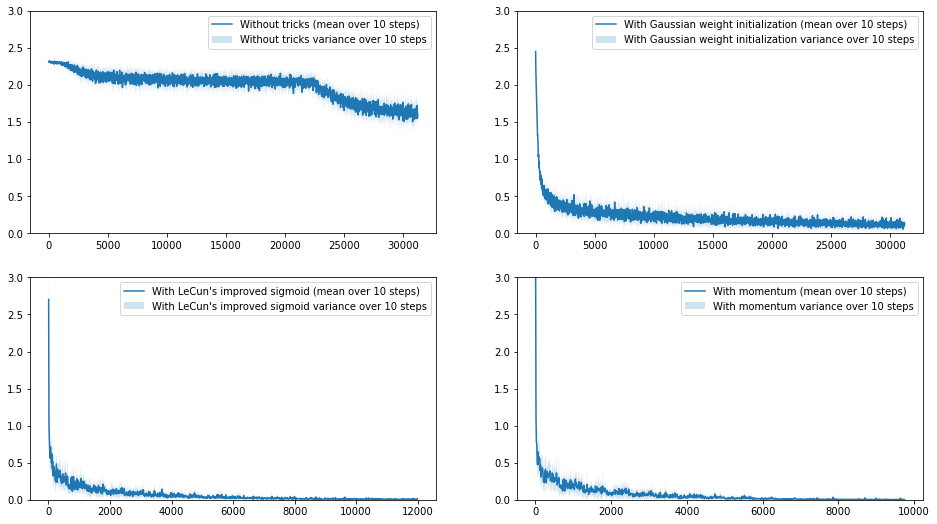

In [7]:
legends = ["Without tricks", "With Gaussian weight initialization", "With LeCun's improved sigmoid", "With momentum"]

plt.figure(figsize=(16, 9))
for i, (experiment, legend) in enumerate(zip(experiments, legends)):
    plt.subplot(2, 2, i + 1)
    utils.plot_loss(experiment['train_history']['loss'],
                    legend, npoints_to_average=10)
    plt.ylim((0, 3))
    plt.legend()

plt.show()


In [8]:
"Save experiments"
with open("experiments.pkl", "wb") as f:
    pickle.dump(experiments, f)

In [27]:
neurons_per_layer = [59, 59, 10]
model = SoftmaxModel(
    neurons_per_layer,
    experiment['use_improved_sigmoid'],
    experiment['use_improved_weight_init']
)

trainer = SoftmaxTrainer(
        momentum_gamma, experiment['use_momentum'],
        model, experiment['learning_rate'], batch_size, shuffle_data,
        X_train, Y_train, X_val, Y_val,
)

running_sum = 0
for layer in model.ws:
    running_sum += layer.shape[0]*layer.shape[1]
print(running_sum)

Initializing weight to shape: (785, 59)
Initializing weight to shape: (59, 59)
Initializing weight to shape: (59, 10)
50386
